# DATA SCIENCE AND BUSINESS ANALYTICS INTERN at SPARKS FOUNDATION

## Author: Dipak Patil

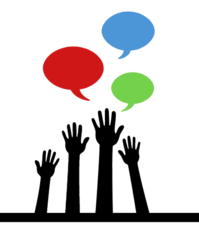

# TASK-5 Exploratory Data Analysis - Sports

##### Objectives

Perform ‘Exploratory Data Analysis’ on dataset ‘Indian Premier League’

As a sports analysts, find out the most successful teams, players and factors contributing win or loss of a team.

Suggest teams or players a company should endorse for its products.

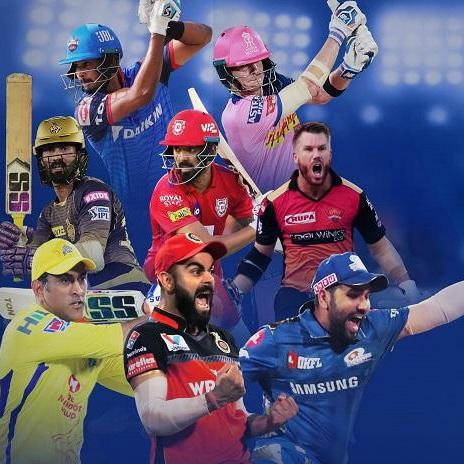

# Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# load the dataset deliveries

In [2]:
dataset1 = pd.read_csv('D:\Machine Learning\deliveries.csv')
dataset1.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


# load the dataset matches

In [3]:
dataset2 = pd.read_csv('D:\Machine Learning\matches.csv')
dataset2.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
dataset1.shape

(179078, 21)

In [5]:
dataset2.shape

(756, 18)

In [6]:
dataset2.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

# checking null values

In [7]:
dataset1.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [8]:
dataset2.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [9]:
dataset1.describe()     # basic statistics

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [10]:
dataset2.describe()     # basic statistics

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [11]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
id                 756 non-null int64
season             756 non-null int64
city               749 non-null object
date               756 non-null object
team1              756 non-null object
team2              756 non-null object
toss_winner        756 non-null object
toss_decision      756 non-null object
result             756 non-null object
dl_applied         756 non-null int64
winner             752 non-null object
win_by_runs        756 non-null int64
win_by_wickets     756 non-null int64
player_of_match    752 non-null object
venue              756 non-null object
umpire1            754 non-null object
umpire2            754 non-null object
umpire3            119 non-null object
dtypes: int64(5), object(13)
memory usage: 106.4+ KB


# Visualizations

## Check the IPL Seasons

In [12]:
dataset2['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019], dtype=int64)

## Check IPL team won by maximum run

In [13]:
dataset2.iloc[dataset2['win_by_runs'].idxmax()]

id                               44
season                         2017
city                          Delhi
date                     2017-05-06
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
umpire3                         NaN
Name: 43, dtype: object

## Check IPL team won by maximum wickets

In [14]:
dataset2.iloc[dataset2['win_by_wickets'].idxmax()]

id                                                      3
season                                               2017
city                                               Rajkot
date                                           2017-04-07
team1                                       Gujarat Lions
team2                               Kolkata Knight Riders
toss_winner                         Kolkata Knight Riders
toss_decision                                       field
result                                             normal
dl_applied                                              0
winner                              Kolkata Knight Riders
win_by_runs                                             0
win_by_wickets                                         10
player_of_match                                   CA Lynn
venue              Saurashtra Cricket Association Stadium
umpire1                                       Nitin Menon
umpire2                                         CK Nandan
umpire3       

In [15]:
dataset2.iloc[dataset2['win_by_wickets'].idxmin()]    # minimum wickets

id                                                         1
season                                                  2017
city                                               Hyderabad
date                                              2017-04-05
team1                                    Sunrisers Hyderabad
team2                            Royal Challengers Bangalore
toss_winner                      Royal Challengers Bangalore
toss_decision                                          field
result                                                normal
dl_applied                                                 0
winner                                   Sunrisers Hyderabad
win_by_runs                                               35
win_by_wickets                                             0
player_of_match                                 Yuvraj Singh
venue              Rajiv Gandhi International Stadium, Uppal
umpire1                                          AY Dandekar
umpire2                 

## Most Valuable Player

In [16]:
mvp_ser = dataset2['player_of_match'].value_counts()
mvp = pd.DataFrame(columns=["player", "wins"])
count = 0
for items in mvp_ser.iteritems():
    if count>5:
        break
    else:
        temp_dataset2 = pd.DataFrame({
            'player':[items[0]],
            'wins':[items[1]]
        })
        mvp = mvp.append(temp_dataset2, ignore_index=True)
        count += 1 
mvp

,player,wins
0,CH Gayle,21
1,AB de Villiers,20
2,RG Sharma,17
3,MS Dhoni,17
4,DA Warner,17
5,YK Pathan,16


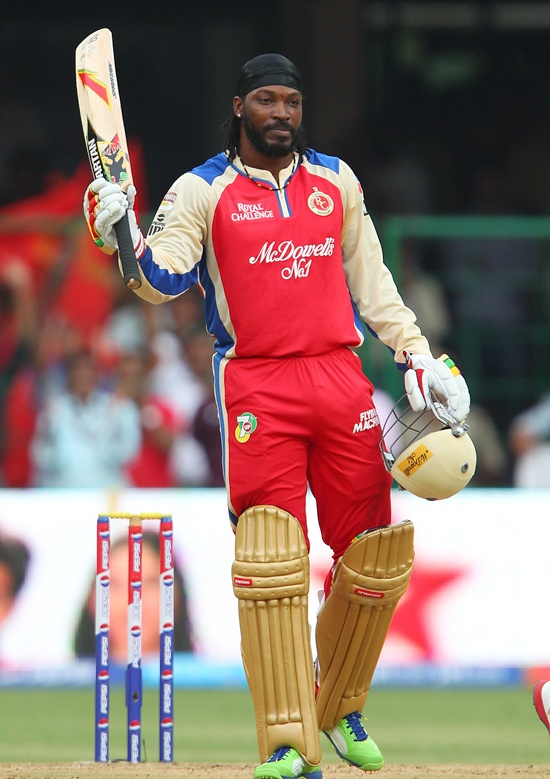

observation : CH Gayle is the most valuable player.

## Best umpires

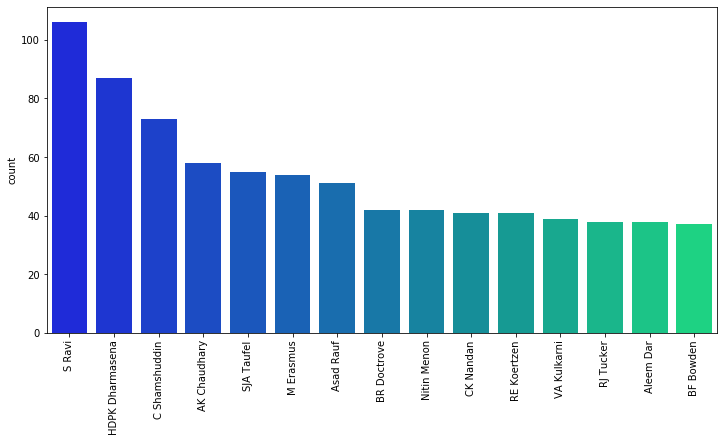

In [17]:
plt.figure(figsize=(12,6))
ump = pd.DataFrame(pd.concat([dataset2['umpire1'], dataset2['umpire2']]),columns = ['count'])
ump = ump.apply(pd.value_counts)
sns.barplot(x = ump[:15].index, y= ump[:15]['count'], palette = 'winter')
plt.xticks(rotation=90)
plt.show()

## The most successful IPL team

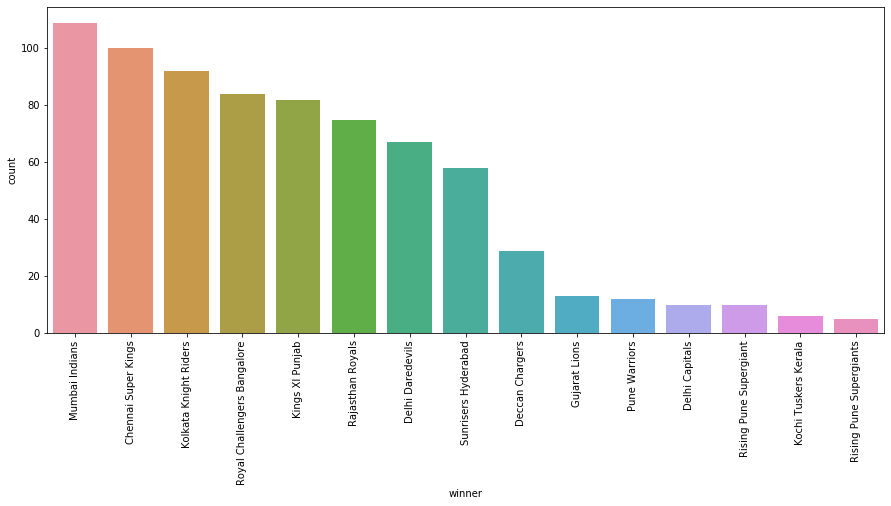

In [18]:
plt.figure(figsize=(15,6))
fav_cities = dataset2['winner'].value_counts().reset_index()
fav_cities.columns = ['winner','count']
sns.barplot(x = 'winner',y = 'count', data = fav_cities[:20])
plt.xticks(rotation=90)
plt.show()

In [19]:
team_wins_ser = dataset2['winner'].value_counts()

team_wins_data = pd.DataFrame(columns=["team", "wins"])
for items in team_wins_ser.iteritems():
    temp_dataset1 = pd.DataFrame({
        'team':[items[0]],
        'wins':[items[1]]
    })
    team_wins_data = team_wins_data.append(temp_dataset1, ignore_index=True)

In [20]:
team_wins_data

,team,wins
0,Mumbai Indians,109
1,Chennai Super Kings,100
2,Kolkata Knight Riders,92
3,Royal Challengers Bangalore,84
4,Kings XI Punjab,82
5,Rajasthan Royals,75
6,Delhi Daredevils,67
7,Sunrisers Hyderabad,58
8,Deccan Chargers,29
9,Gujarat Lions,13


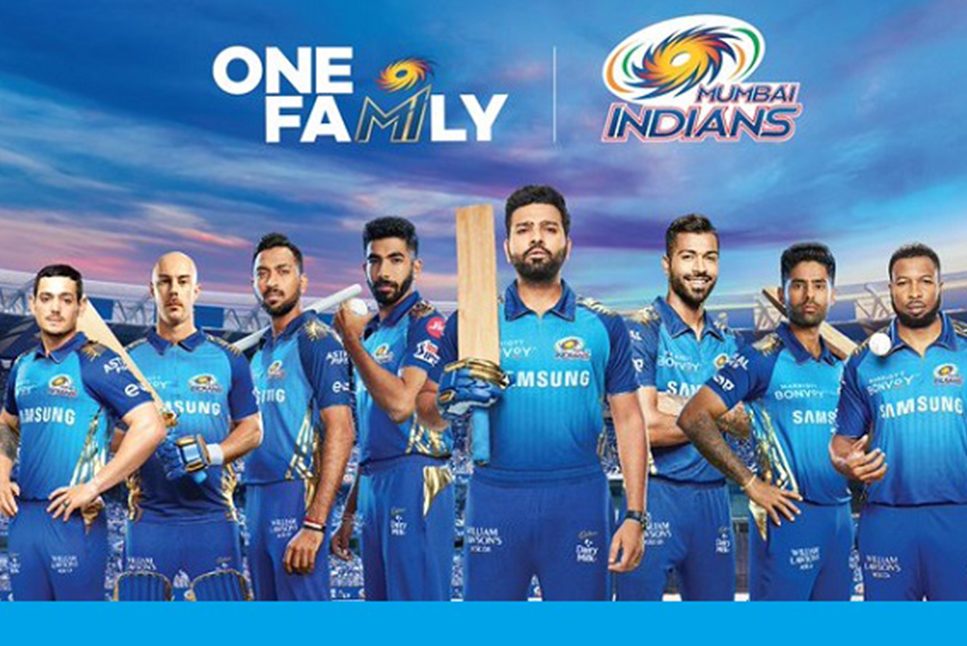

 Observation : Mumbai Indians is the most successful team.they have won the maximum number of IPL matches -109.

## Maximum no. of matches played in each city

In [21]:
dataset2['city'].value_counts()

Mumbai            101
Kolkata            77
Delhi              74
Bangalore          66
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          14
Visakhapatnam      13
Centurion          12
Ahmedabad          12
Mohali             10
Rajkot             10
Dharamsala          9
Indore              9
Johannesburg        8
Cape Town           7
Cuttack             7
Ranchi              7
Abu Dhabi           7
Port Elizabeth      7
Raipur              6
Sharjah             6
Kochi               5
Kanpur              4
Nagpur              3
East London         3
Kimberley           3
Bloemfontein        2
Name: city, dtype: int64

## Most No of matches played in stadium

Top 10 Stadiums with the maximum number of Matches Played:
                                          venue  Match Counts
8                                 Eden Gardens            77
40                            Wankhede Stadium            73
17                       M Chinnaswamy Stadium            73
9                             Feroz Shah Kotla            67
28   Rajiv Gandhi International Stadium, Uppal            56
20             MA Chidambaram Stadium, Chepauk            49
32                      Sawai Mansingh Stadium            47
27  Punjab Cricket Association Stadium, Mohali            35
21     Maharashtra Cricket Association Stadium            21
5                   Dr DY Patil Sports Academy            17


Text(0.5, 1.0, 'Top Stadiums that have hosted IPL Matches')

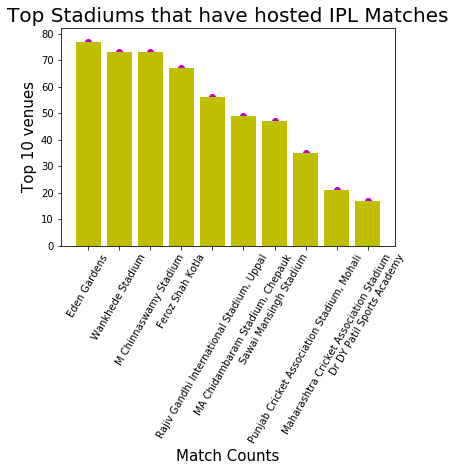

In [22]:
venue_counts=dataset2.groupby('venue').apply(lambda x:x['venue'].count()).reset_index(name='Match Counts')
top_venues_order=venue_counts.sort_values(by='Match Counts',ascending=False)
top_venues=top_venues_order[:10]
print('Top 10 Stadiums with the maximum number of Matches Played:\n',top_venues)
plt.bar(top_venues['venue'],top_venues['Match Counts'],color='y')
plt.scatter(top_venues['venue'],top_venues['Match Counts'],color='m')
plt.xticks(rotation=60)
plt.xlabel('Match Counts',size=15)
plt.ylabel('Top 10 venues',size=15)
plt.title('Top Stadiums that have hosted IPL Matches',size=20)

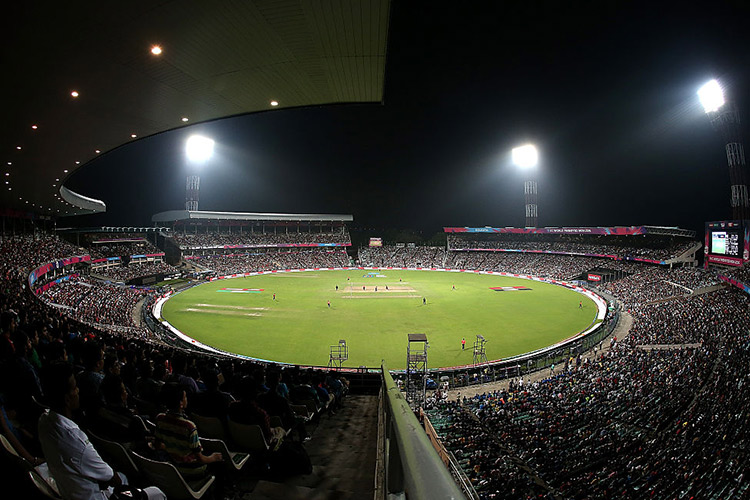

## Highest run scorer Batsman

The Top 10 Batsmen in thr Tournament are:
             batsman  Runs
486         V Kohli  5434
428        SK Raina  5415
367       RG Sharma  4914
112       DA Warner  4741
392        S Dhawan  4632
92         CH Gayle  4560
290        MS Dhoni  4477
384      RV Uthappa  4446
26   AB de Villiers  4428
147       G Gambhir  4223


Text(0.5, 1.0, 'Top 10 Batsmen in IPL- Seasons 2008-2019')

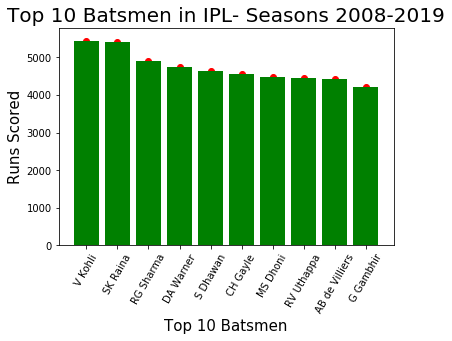

In [23]:
batting_tot=dataset1.groupby('batsman').apply(lambda x:np.sum(x['batsman_runs'])).reset_index(name='Runs')
batting_sorted=batting_tot.sort_values(by='Runs',ascending=False)
top_batsmen=batting_sorted[:10] 
print('The Top 10 Batsmen in thr Tournament are:\n',top_batsmen)
plt.bar(top_batsmen['batsman'],top_batsmen['Runs'],color='g')
plt.scatter(top_batsmen['batsman'],top_batsmen['Runs'],color='r')
plt.xticks(rotation=60)
plt.xlabel('Top 10 Batsmen',size=15)
plt.ylabel('Runs Scored',size=15)
plt.title('Top 10 Batsmen in IPL- Seasons 2008-2019',size=20)

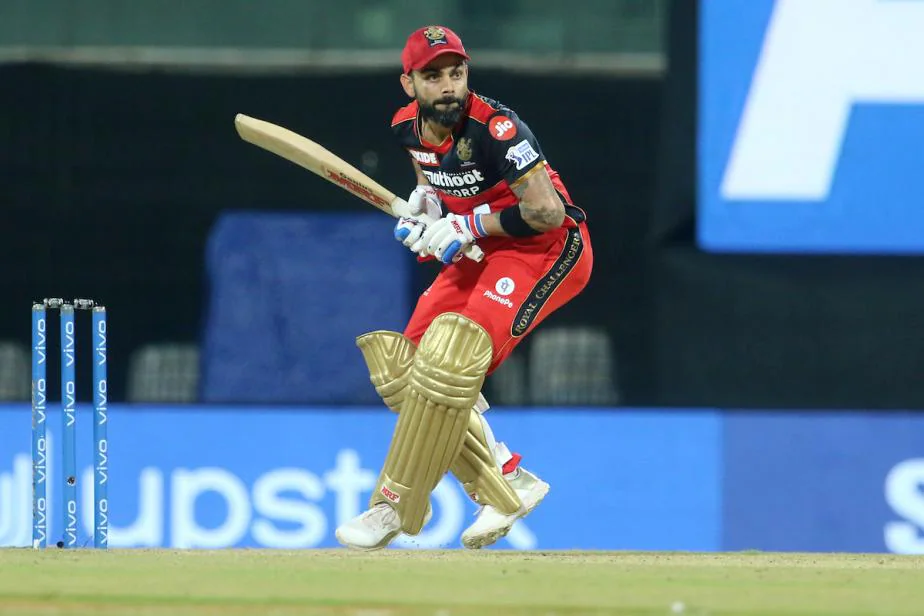

###### Highest run scorer Batsman is virat kohli,then SK raina

## Man of the match - Highest to lowest (in won matches)

In [24]:
dataset2['player_of_match'].value_counts()

CH Gayle           21
AB de Villiers     20
RG Sharma          17
MS Dhoni           17
DA Warner          17
                   ..
CR Brathwaite       1
Shoaib Akhtar       1
KMDN Kulasekara     1
DL Vettori          1
M Ur Rahman         1
Name: player_of_match, Length: 226, dtype: int64

## Match Played each Season

In [25]:
dataset2['season'].value_counts()

2013    76
2012    74
2011    73
2019    60
2018    60
2016    60
2014    60
2010    60
2017    59
2015    59
2008    58
2009    57
Name: season, dtype: int64

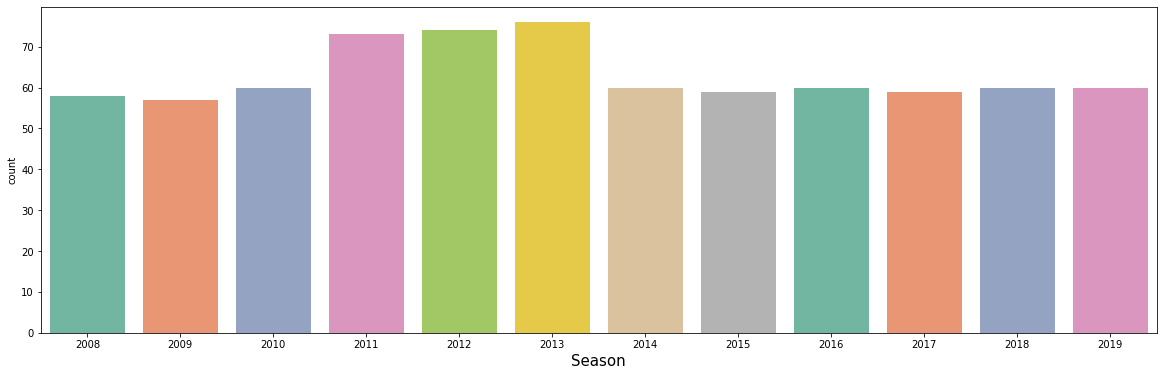

In [26]:
plt.figure(figsize=(20,6))
sns.countplot(x='season',data=dataset2,palette='Set2')
plt.xlabel('Season',fontsize=15)
plt.show()

## Probability of winning the match if the toss was won

In [27]:
probability_of_win = dataset2['toss_winner'] == dataset2['winner']
probability_of_win.groupby(probability_of_win).size()

False    363
True     393
dtype: int64

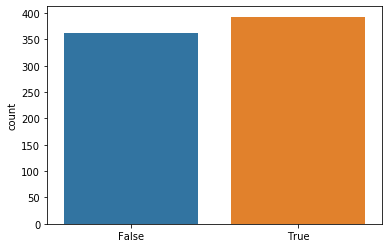

In [28]:
sns.countplot(probability_of_win)

## Biggest wins by run each Season

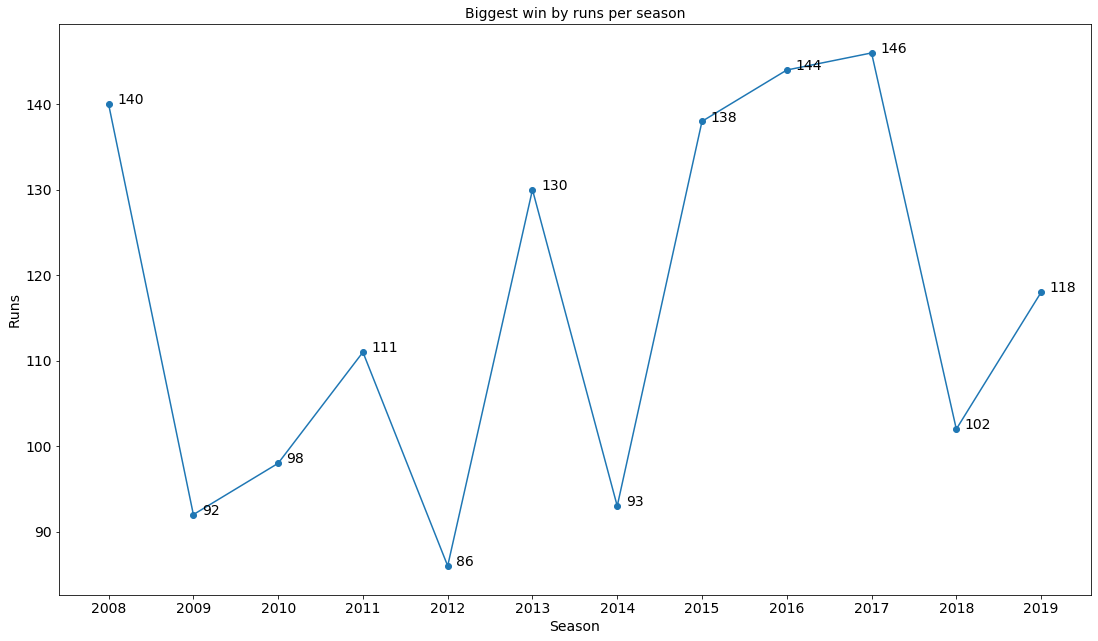

In [29]:
s=2008
season=[]
win_by_runs_max=[]
while s<2020:
    season.append(s)
    win_by_runs_max.append(dataset2[dataset2['season']==s]['win_by_runs'].max())
    s+=1
fig=plt.gcf()
fig.set_size_inches(18.5,10.5)
plt.plot(season,win_by_runs_max)
plt.scatter(season,win_by_runs_max)
count=0
while count<12:
    plt.text(season[count]+0.1,win_by_runs_max[count],str(win_by_runs_max[count]),size=14)
    count+=1
plt.xticks(range(2008,2020),fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Season',fontsize=14)
plt.ylabel('Runs',fontsize=14)
plt.title('Biggest win by runs per season',fontsize=14)
plt.show()

## Stadium wise winnings

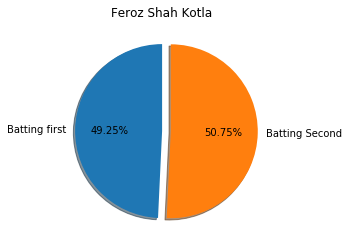

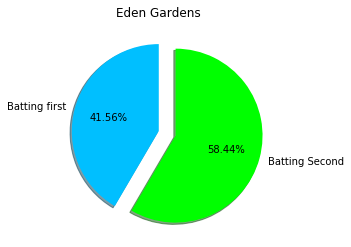

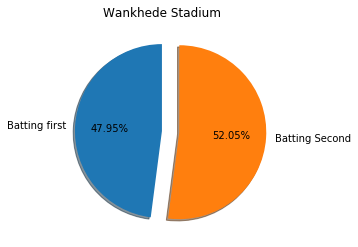

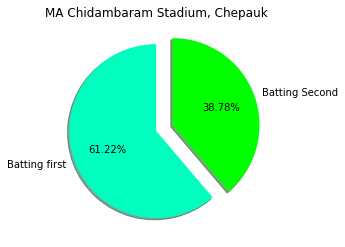

In [30]:
# 'Feroz Shah Kotla'
Delhi_stadium=dataset2.loc[(dataset2['venue']=='Feroz Shah Kotla') ]
Delhi_stadium_win_by_runs=Delhi_stadium[Delhi_stadium['win_by_runs']>0]
slices=[len(Delhi_stadium_win_by_runs),len(Delhi_stadium)-len(Delhi_stadium_win_by_runs)]
labels=['Batting first','Batting Second']
plt.pie(slices,labels=labels,startangle=90,shadow=1,explode=(0,0.1),autopct='%1.2f%%')
plt.title('Feroz Shah Kotla')
plt.show()

# Eden Gardens
Kolkata_stadium=dataset2.loc[(dataset2['venue']=='Eden Gardens') ]
Kolkata_stadium_win_by_runs=Kolkata_stadium[Kolkata_stadium['win_by_runs']>0]# As it is  win by runs this depicts Team batting First Has Won the match
slices=[len(Kolkata_stadium_win_by_runs),len(Kolkata_stadium)-len(Kolkata_stadium_win_by_runs)]
labels=['Batting first','Batting Second']
plt.pie(slices,labels=labels,startangle=90,shadow=1,explode=(0,0.2),autopct='%1.2f%%',colors=['#00bfff','#00ff00'])
plt.title('Eden Gardens')
plt.show()

# 'Wankhede Stadium'
Mumbai_stadium=dataset2.loc[(dataset2['venue']=='Wankhede Stadium') ]
Mumbai_stadium_win_by_runs=Mumbai_stadium[Mumbai_stadium['win_by_runs']>0]# As it is  win by runs this depicts Team batting First Has Won the match
slices=[len(Mumbai_stadium_win_by_runs),len(Mumbai_stadium)-len(Mumbai_stadium_win_by_runs)]
labels=['Batting first','Batting Second']
plt.pie(slices,labels=labels,startangle=90,shadow=1,explode=(0,0.2),autopct='%1.2f%%')
plt.title('Wankhede Stadium')
plt.show()

# 'MA Chidambaram Stadium, Chepauk'
Chennai_stadium=dataset2.loc[(dataset2['venue']=='MA Chidambaram Stadium, Chepauk') ]
Chennai_stadium_win_by_runs=Chennai_stadium[Chennai_stadium['win_by_runs']>0]# As it is  win by runs this depicts Team batting First Has Won the match
slices=[len(Chennai_stadium_win_by_runs),len(Chennai_stadium)-len(Chennai_stadium_win_by_runs)]
labels=['Batting first','Batting Second']
plt.pie(slices,labels=labels,startangle=90,shadow=1,explode=(0,0.2),autopct='%1.2f%%',colors=['#00ffbf','#00ff00'])
plt.title('MA Chidambaram Stadium, Chepauk')
plt.show()

## Highest Run by teams

In [31]:
high_scores=dataset1.groupby(['match_id', 'inning','batting_team','bowling_team'])['total_runs'].sum().reset_index() 
#reset_index() converts the obtained series into a dataframe
high_scores=high_scores[high_scores['total_runs']>=200]
#nlargest is used to sort the given column
high_scores.nlargest(10,'total_runs')

,match_id,inning,batting_team,bowling_team,total_runs
829,411,1,Royal Challengers Bangalore,Pune Warriors,263
1370,7937,1,Kolkata Knight Riders,Kings XI Punjab,250
1250,620,1,Royal Challengers Bangalore,Gujarat Lions,248
416,206,1,Chennai Super Kings,Rajasthan Royals,246
1498,11338,1,Kolkata Knight Riders,Mumbai Indians,241
122,61,1,Chennai Super Kings,Kings XI Punjab,240
1134,562,1,Royal Challengers Bangalore,Mumbai Indians,235
1426,11147,1,Sunrisers Hyderabad,Royal Challengers Bangalore,233
596,296,1,Kings XI Punjab,Royal Challengers Bangalore,232
1500,11339,1,Sunrisers Hyderabad,Kings XI Punjab,232


## Highest Run by player

In [32]:
top_scorers = dataset1.groupby(["match_id", "batsman","batting_team"])["batsman_runs"].sum().reset_index()
top_scorers.sort_values('batsman_runs', ascending=0).head(10)
top_scorers.nlargest(10,'batsman_runs')

,match_id,batsman,batting_team,batsman_runs
6200,411,CH Gayle,Royal Challengers Bangalore,175
900,60,BB McCullum,Kolkata Knight Riders,158
8426,562,AB de Villiers,Royal Challengers Bangalore,133
10149,7935,RR Pant,Delhi Daredevils,130
9257,620,AB de Villiers,Royal Challengers Bangalore,129
5585,372,CH Gayle,Royal Challengers Bangalore,128
3135,206,M Vijay,Chennai Super Kings,127
529,36,DA Warner,Sunrisers Hyderabad,126
7752,516,V Sehwag,Kings XI Punjab,122
10417,7953,SR Watson,Chennai Super Kings,121


## Total Runs each season

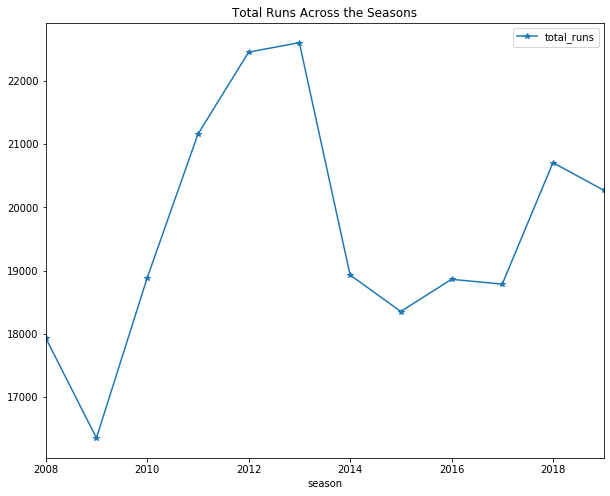

In [33]:
batsmen = dataset2[['id','season']].merge(dataset1, left_on = 'id', right_on = 'match_id', how = 'left').drop('id', axis = 1)
#merging the matches and delivery dataframe by referencing the id and match_id columns respectively
season=batsmen.groupby(['season'])['total_runs'].sum().reset_index()
season.set_index('season').plot(marker='*')
plt.gcf().set_size_inches(10,8)
plt.title('Total Runs Across the Seasons')
plt.show()

## Boundaries (6 and 4 run)

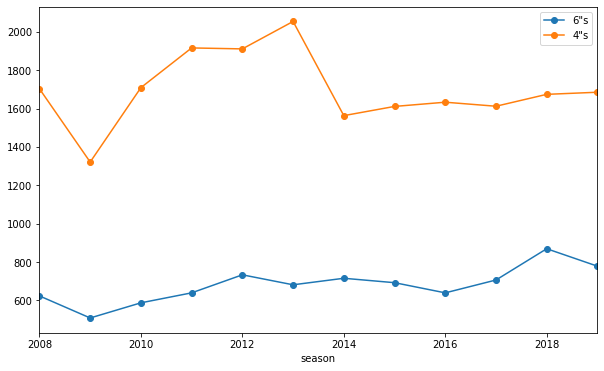

In [34]:
Season_boundaries=batsmen.groupby("season")["batsman_runs"].agg(lambda x: (x==6).sum()).reset_index()
a=batsmen.groupby("season")["batsman_runs"].agg(lambda x: (x==4).sum()).reset_index()
Season_boundaries=Season_boundaries.merge(a,left_on='season',right_on='season',how='left')
Season_boundaries=Season_boundaries.rename(columns={'batsman_runs_x':'6"s','batsman_runs_y':'4"s'})
Season_boundaries.set_index('season')[['6"s','4"s']].plot(marker='o')
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

# Win by Runs/Win by Wickets- Team wise

Text(0.5, 1.0, 'Teams Average winning by Runs/Wickets Summary')

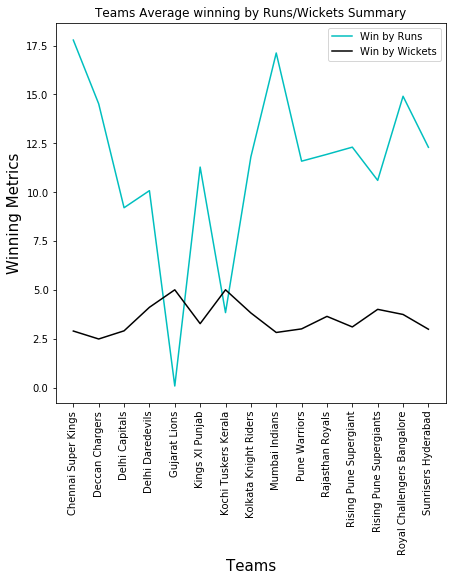

In [35]:
win_runs=dataset2.groupby('winner').apply(lambda x:np.average(x['win_by_runs'])).reset_index(name='Win By Runs Average')
win_wickets=dataset2.groupby('winner').apply(lambda x:np.average(x['win_by_wickets'])).reset_index(name='Win By Wickets Average')
plt.figure(figsize=(7,7))
plt.plot(win_runs['winner'],win_runs['Win By Runs Average'],color='c')
plt.plot(win_wickets['winner'],win_wickets['Win By Wickets Average'],color='k')
plt.xlabel('Teams',size=15)
plt.xticks(rotation=90)
plt.ylabel('Winning Metrics',size=15)
plt.legend(['Win by Runs','Win by Wickets'])
plt.title('Teams Average winning by Runs/Wickets Summary')

## short info of all team

In [36]:
overall_team_stats = pd.DataFrame(
{'Total Matches Played': dataset2["team1"].value_counts() + dataset2["team2"].value_counts(), 
'Toss Won': dataset2["toss_winner"].value_counts(), 'Total Won': dataset2["winner"].value_counts(), 
 'Total Lost': ((dataset2["team1"].value_counts() + dataset2["team2"].value_counts()) - dataset2["winner"].value_counts())})
overall_team_stats.sort_values(by="Total Won", ascending=False)

,Total Matches Played,Toss Won,Total Won,Total Lost
Mumbai Indians,187,98,109,78
Chennai Super Kings,164,89,100,64
Kolkata Knight Riders,178,92,92,86
Royal Challengers Bangalore,180,81,84,96
Kings XI Punjab,176,81,82,94
Rajasthan Royals,147,80,75,72
Delhi Daredevils,161,80,67,94
Sunrisers Hyderabad,108,46,58,50
Deccan Chargers,75,43,29,46
Gujarat Lions,30,15,13,17


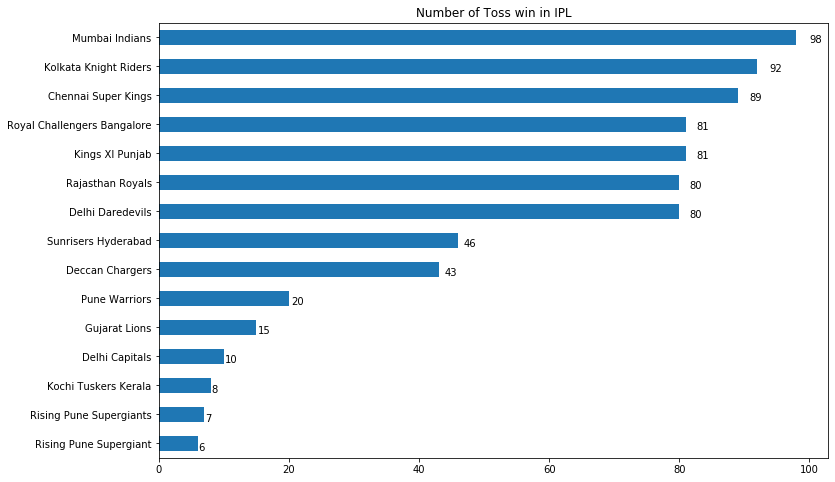

In [37]:
ax = overall_team_stats["Toss Won"].sort_values().plot(kind="barh", title="Number of Toss win in IPL", figsize=(12,8))
for p in ax.patches:
    ax.annotate(str(p.get_width()), (p.get_width() * 1.020, p.get_y() * 1.005))

## Total Super over

In [38]:
print(f"Total Super Over:{dataset1['is_super_over'].value_counts()[1]}")

Total Super Over:81


## Conlusion:

As a company you should invest in Mumbai indians & Chennai Super Kings these are top performing teams.   
Virat Kohli, Chris Gayle, AB de Villiers,Suresh Raina, Rohit Sharma are top performing players

## THANK YOU